In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [38]:
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
data_fruit = pd.read_excel('fruit.xlsx')
data_fish = pd.read_csv('fish_data.csv')
df


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


Data Understanding


In [39]:
print("Data Shape : ", df.shape)

Data Shape :  (2500, 13)


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [41]:
df[['Area', 'Perimeter', 'Solidity', 'Extent']].describe()

,Area,Perimeter,Solidity,Extent
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,0.989492,0.693205
std,13664.510228,109.256418,0.003494,0.060914
min,47939.000000,868.485000,0.918600,0.468000
25%,70765.000000,1048.829750,0.988300,0.658900
50%,79076.000000,1123.672000,0.990300,0.713050
75%,89757.500000,1203.340500,0.991500,0.740225
max,136574.000000,1559.450000,0.994400,0.829600


In [42]:
df.Class.value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

Cleaning Data

In [43]:
df.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [44]:
df.duplicated().sum()

0

Explorasi Data Analis (EDA)

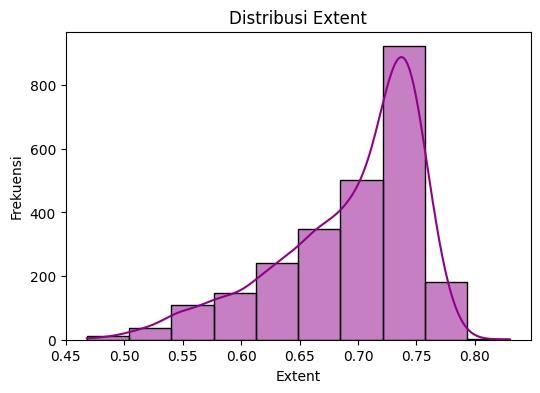

In [45]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Extent',bins=10, kde=True, color='#91008a')

plt.title('Distribusi Extent')
plt.xlabel('Extent')
plt.ylabel('Frekuensi')
plt.show()

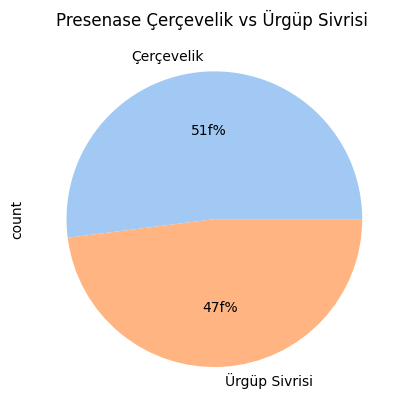

In [46]:
sns.set_palette('pastel')
df['Class'].value_counts().plot(kind='pie',autopct='%1.if%%')
plt.title('Presenase Çerçevelik vs Ürgüp Sivrisi ')
plt.show()

C:\Users\ALIF RAMA\AppData\Local\Temp\ipykernel_11748\4034672840.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Class', palette='rocket')


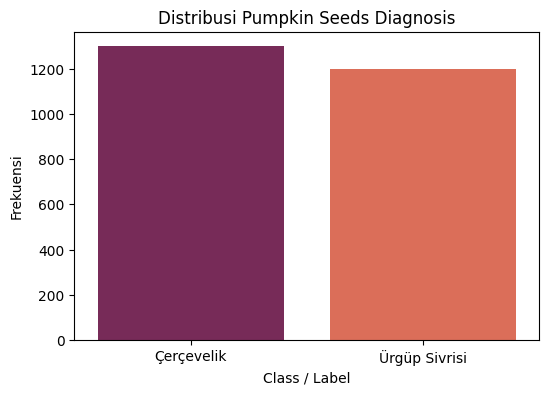

In [47]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', palette='rocket')

plt.title('Distribusi Pumpkin Seeds Diagnosis')
plt.xlabel('Class / Label')
plt.ylabel('Frekuensi')
plt.show()

In [48]:
df['Class']=df['Class'].replace(['Çerçevelik','Ürgüp Sivrisi'],[0,1])

In [49]:
df.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


<Axes: >

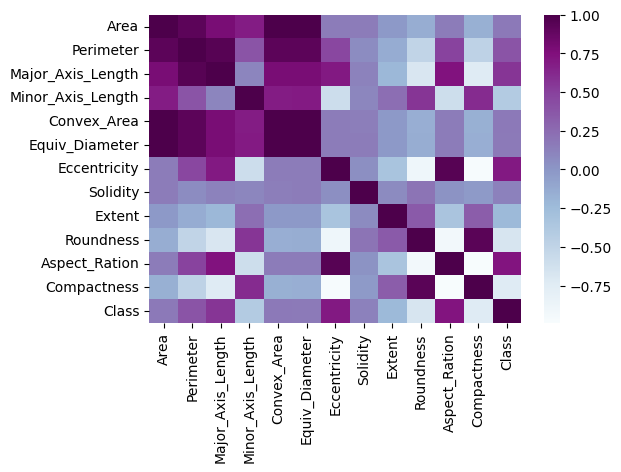

In [50]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu')

In [51]:
df['Class']=df['Class'].replace([0,1], ['Çerçevelik','Ürgüp Sivrisi'])

Preparation Data

In [52]:
x=df.drop(columns=['Class'])
y=df['Class']

xbu = data_fruit.drop(columns=['name'])
ybu = data_fruit['name']

xfi = data_fish.drop(columns=['species'])
yfi = data_fish['species']

print("x : ",x.shape)
print("y : ",y.shape)

x :  (2500, 12)
y :  (2500,)


In [53]:
scaler=StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

scaler.fit(xbu)
xbu= scaler.transform(xbu)

scaler.fit(xfi)
xfi= scaler.transform(xfi)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train_bu, x_test_bu, y_train_bu, y_test_bu = train_test_split(xbu,ybu, test_size=0.2, random_state=42)

x_train_fi, x_test_fi, y_train_fi, y_test_fi = train_test_split(xfi,yfi, test_size=0.2, random_state=42)

Modeling & Evaluasi

In [55]:
clf=SVC(kernel='linear')

clf.fit(x_train,y_train)
fw = open('pumpkin_svm.pkl' , 'wb')
md = pickle.dump(clf , fw)

y_pred=clf.predict(x_test)
CLF_acc=accuracy_score(y_pred,y_test)

print(classification_report(y_test,y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

               precision    recall  f1-score   support

   Çerçevelik       0.83      0.90      0.86       251
Ürgüp Sivrisi       0.89      0.81      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

Akurasi SVM : 85.60%


In [56]:
print(f"Akurasi Dataset Pumpkin Seeds :{CLF_acc*100}%")

clf.fit(x_train_bu, y_train_bu)
fw = open('fruit_svm.pkl' , 'wb')
md = pickle.dump(clf , fw)
y_pred_bu = clf.predict(x_test_bu)
akurasi_bu=accuracy_score(y_pred_bu, y_test_bu)
print(f"Akurasi Dataset Fruit :{akurasi_bu*100}%")

clf.fit(x_train_fi, y_train_fi)
fw = open('fish_svm.pkl' , 'wb')
md = pickle.dump(clf , fw)
y_pred_fi = clf.predict(x_test_fi)
akurasi_fi=accuracy_score(y_pred_fi, y_test_fi)
print(f"Akurasi Dataset Fish :{akurasi_fi*100}%")

Akurasi Dataset Pumpkin Seeds :85.6%
Akurasi Dataset Fruit :95.15%
Akurasi Dataset Fish :92.52450980392157%


Testing

In [57]:
new_data={'Area': [68321, 83537],
          'Perimeter' : [1140.811, 1329.710],
          'Major_Axis_Length' : [781.082, 511.1513],
          'Minor_Axis_Length' : [381.774, 204.4367],
          'Convex_Area' : [77819, 84381],
          'Equiv_Diameter' : [517.926, 298.4289],
          'Eccentricity' : [0.630, 0.9840],
          'Solidity' : [0.9516, 0.9907],
          'Extent' : [0.9153, 0.5798],
          'Roundness' : [0.8416, 0.5972],
          'Aspect_Ration' : [3.7810, 2.5996],
          'Compactness' : [0.7612, 0.5973]}


new_data =pd.DataFrame(new_data)
new_data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,68321,1140.811,781.0820,381.7740,77819,517.9260,0.630,0.9516,0.9153,0.8416,3.7810,0.7612
1,83537,1329.710,511.1513,204.4367,84381,298.4289,0.984,0.9907,0.5798,0.5972,2.5996,0.5973


In [58]:
clf.fit(x_train,y_train)
scaler.fit(x)
scaled_new_data = scaler.transform(new_data)
y_pred_new=clf.predict(scaled_new_data)


print("Diagnosis Data Baru : ", y_pred_new)


Diagnosis Data Baru :  ['Ürgüp Sivrisi' 'Ürgüp Sivrisi']


C:\Users\ALIF RAMA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [59]:
opf = open('pumpkin_svm.pkl' , 'rb')
model = pickle.load(opf)
y_pred_model = model.predict(new_data)

print("Hasil Prediksi dari model : ",y_pred_model)

Hasil Prediksi dari model :  ['Ürgüp Sivrisi' 'Ürgüp Sivrisi']


C:\Users\ALIF RAMA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
